***

<font color='green'>

# Task Solution: Computer Vision with CNN - Project 1 (Part 3)

#### Domain: Automobile

#### Context: A brand research company wants to understand which cars or car manufacturers are popular in a certain area of the city or locality. Company has a team which takes pictures of the cars randomly through the day. Using this the company wants to set up an automation which can classify the make of the car once the picture has been given as an input.

#### Task: Help to build the image dataset to be used by the AI team to build an image classifier data. Import and display the images in Python against their labels. Comment on the challenges faced during this task.

***
***
*Prepared by: Sauvik De*

*Date: April 5, 2021*
    
</font>

***

In [1]:
#import sys
#!{sys.executable} -m pip install opencv-python

import os, glob, cv2, shutil

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import tensorflow
import tensorflow as tf

#### Read in image datafile

In [2]:
# Utility function to read in image files and pre-process
# =======================================================
def read_images_and_preprocess(folder, image_size=128):
    imageScaled = []
    imageNames = []
    fileNames = []
    imageShape = []
    for filename in glob.iglob(folder+'/**', recursive=True):
        if os.path.isfile(filename):
            img = cv2.imread(filename)
            # temp store image dimension/shape
            rawShape = img.shape
            # read in and resize image
            img = tf.keras.preprocessing.image.load_img(path=filename.replace('\\', '/')
                                                        , target_size=(image_size, image_size))
            # convert to 3D Numpy array
            img_array = tf.keras.preprocessing.image.img_to_array(img=img)
            # Scale pixel intensities to range between 0 and 1
            img_array = img_array * 1./255
            # Store the scaled image pixel intensities for image analysis (features)
            imageScaled.append(img_array)
            # Store image class (response categories)
            imageNames.append(os.path.basename(os.path.dirname(filename.replace('\\', '/'))))
            # Store image file name
            fileNames.append(os.path.basename(filename.replace('\\', '/')))
            # Store image dimension/shape
            imageShape.append(rawShape)
    # Convert scaled image pixel intensities to Numpy array of float type
    imageScaled = np.array(imageScaled, dtype=np.float32)
    return imageScaled, imageNames, fileNames, imageShape

In [3]:
# Define target image size that resizes all input images to 128 x 128
image_size = 128

In [4]:
# Read in image files and pre-process images to resize 128 x 128 and rescale pixel intensities between (0,1) 
images, _, filename, imageShape = read_images_and_preprocess('Dataset - Images/Images', image_size=image_size)

#### Analyze dimension of training image data

In [5]:
# Analyze dimension of training images
print('No. of training samples:', len(imageShape))
print('\nTraining images shapes:')
print(pd.DataFrame(imageShape, columns=['Width', 'Height', 'Depth']))
print('\nAverage raw training image shape:')
print(np.array(imageShape).mean(axis=0))
print('\nStd. Dev. of raw training image shape:')
print(np.array(imageShape).std(axis=0))
print('\nNote 1: All images are colored (RGB) and rectangular-shaped.')
print('Note 2: Raw images are of varying sizes with largest image size being', \
      np.array(imageShape).max(axis=0)[0:2], 'and smallest image size being', np.array(imageShape).min(axis=0)[0:2])

No. of training samples: 15

Training images shapes:
    Width  Height  Depth
0     400     600      3
1     675     900      3
2     480     640      3
3    1386    2100      3
4     108     144      3
5     431     575      3
6     480     640      3
7     480     639      3
8     843    1280      3
9     480     640      3
10    424     640      3
11    315     500      3
12    335     500      3
13    600     800      3
14    424     640      3

Average raw training image shape:
[524.06666667 749.2          3.        ]

Std. Dev. of raw training image shape:
[280.19147421 427.90749779   0.        ]

Note 1: All images are colored (RGB) and rectangular-shaped.
Note 2: Raw images are of varying sizes with largest image size being [1386 2100] and smallest image size being [108 144]


In [6]:
# Scaled image shapes
print('Scaled + resized image shape:', images.shape)
print('\nScaled pixel intensities of images lie between',  images.min(), 'and', images.max())
print('\nNote 1: Images resized to squared images of size', images.shape[1])
print('Note 2: No. of images:', images.shape[0])
print('Note 3: All images are colored')

Scaled + resized image shape: (15, 128, 128, 3)

Scaled pixel intensities of images lie between 0.0 and 1.0

Note 1: Images resized to squared images of size 128
Note 2: No. of images: 15
Note 3: All images are colored


In [7]:
print('Following are the image filenames:')
print(filename)

Following are the image filenames:
['00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg', '00006.jpg', '00007.jpg', '00008.jpg', '00009.jpg', '00010.jpg', '00011.jpg', '00012.jpg', '00013.jpg', '00014.jpg', '00015.jpg']


#### Comments on task and strategies

- Given the task is to build the image dataset to be used by the AI team to build an image classifier data.
- Since the expectation is preparing an image classifier for a given input car image, this is a classification problem.
- Classification problem is a supervised learning problem and hence the need for image classes (i.e., car-make/brands).
- However, we have only the images for 15 cars without labels - hence the need to populate car-make/brand labels for each of the 15 images - for e.g.: Audi, GM, Ford etc.
- Thinking through the problem statement, it may be relevant to consider car colors as a potential predictor of the car brand.
- Since we are dealing with image classification problem, neural network models come into picture and hence the need for large sample size. However, notably there are only 15 car images - i.e, sample size is too small for neural network model to evaluate on. Hence the need for more samples. This can be achieved through image augmentation with higher batch size.

In [8]:
# I prepared a file with the brand and color info merely by looking at the car images
# Note: I took help of Google Lens to gauge some car brands
cars = pd.read_csv('CarData.csv')
cars

ImageFile        CarMake  Color
0   00001.jpg           Audi  White
1   00002.jpg          Acura  Black
2   00003.jpg          Dodge    Red
3   00004.jpg        Hyundai    Red
4   00005.jpg           Ford  White
5   00006.jpg  General Motor    Red
6   00007.jpg          Dodge   Blue
7   00008.jpg          Dodge    Red
8   00009.jpg     Mitsubishi   Grey
9   00010.jpg      Chevrolet   Grey
10  00011.jpg  General Motor  White
11  00012.jpg         Toyota   Grey
12  00013.jpg        Hyundai  White
13  00014.jpg          Dodge  White
14  00015.jpg          Volvo    Red

In [9]:
# Add car make labels (target variable) and also add car color (new feature)
#image_labels = np.array(['Audi', 'Acura', 'Dodge', 'Hyundai', 'Ford', 'General Motor', 'Dodge', 'Dodge', 
#                         'Mitsubishi', 'Chevrolet', 'General Motor', 'Toyota', 'Hyundai', 'Dodge', 'Volvo'])

#image_colors = np.array(['White', 'Black', 'Red', 'Red', 'White', 'Red', 'Blue', 'Red', 'Grey', 'Grey',
#                         'White', 'Grey', 'White', 'White', 'Red'])

- We have the exact same image order (png files) for both (read-in) file and (read-in) image from folder.

In [10]:
# Prepare input image and class labels for model ingestion 
y = cars['CarMake']
X = images # features based on purely image-pixels

In [11]:
print('There are', y.nunique(), 'car brands in the dataset.')

There are 10 car brands in the dataset.


In [12]:
# Prepare potential feature 'color' to predict car-brand ... to be used after ConvNet layer of image filtering
car_color = pd.concat([cars['CarMake'], pd.get_dummies(cars['Color'])], axis=1)
car_color

CarMake  Black  Blue  Grey  Red  White
0            Audi      0     0     0    0      1
1           Acura      1     0     0    0      0
2           Dodge      0     0     0    1      0
3         Hyundai      0     0     0    1      0
4            Ford      0     0     0    0      1
5   General Motor      0     0     0    1      0
6           Dodge      0     1     0    0      0
7           Dodge      0     0     0    1      0
8      Mitsubishi      0     0     1    0      0
9       Chevrolet      0     0     1    0      0
10  General Motor      0     0     0    0      1
11         Toyota      0     0     1    0      0
12        Hyundai      0     0     0    0      1
13          Dodge      0     0     0    0      1
14          Volvo      0     0     0    1      0

#### Visualize car image data

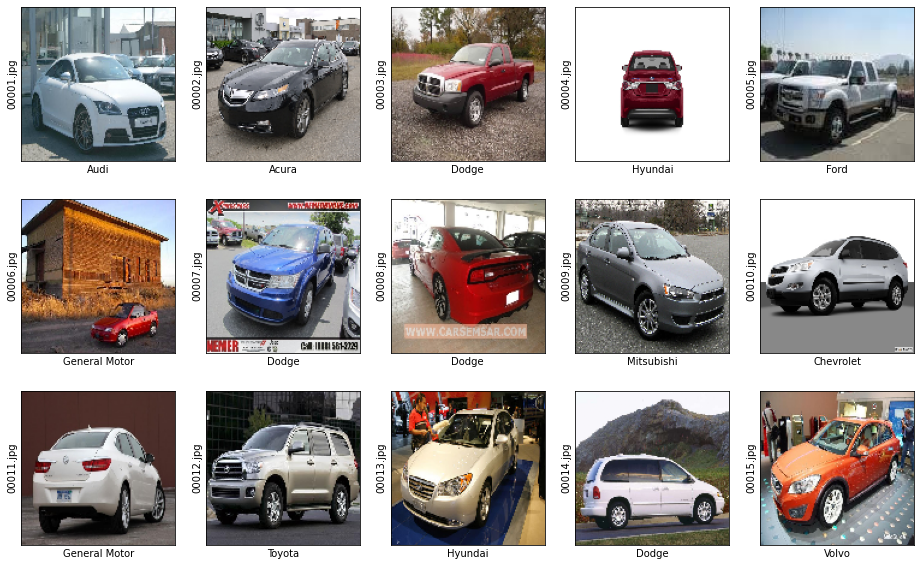

In [13]:
# Display car images
plt.figure(figsize=(16,10))
for i in range(len(images)):
    plt.subplot(3,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i])
    plt.xlabel(y[i])
    plt.ylabel(filename[i])
plt.show()

- As evident, we have 15 cars from 10 different brands. Hence we need lot of car samples to enable accurate prediction of car brands. Moreover cars are positioned in different directions and at different angles.
- So the need for image augmentation on the input car image samples

#### Image augmentation

In [14]:
# Augmented image generator
imgdatagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=30 #Degree range for random rotations
                                                             , zoom_range=0.1 #Randomly zoom
                                                             , width_shift_range=0.2 #Randomly shift input horizontally
                                                             , height_shift_range=0.2 #Randomly shift input vertically
                                                             , horizontal_flip=True #Randomly flip input horizontally
                                                             , vertical_flip=True #Randomly flip input vertically
                                                            )

In [15]:
# Fit image data generator on image data
imgdatagen.fit(X)

In [16]:
# Create a new directory where augmented images to be stored for future usage
if os.path.exists('Dataset - Images/Augmented_Images'):
    shutil.rmtree('Dataset - Images/Augmented_Images')

os.mkdir('Dataset - Images/Augmented_Images')

In [17]:
# Configure the batch size and prepare the data generator and get batches of training images
# And, store them in disk for future use (JUST STORING SAMPLE OF AUGMENTED IMAGES ...)
i=0
for X_batch in imgdatagen.flow(x=X
                               , batch_size=9
                               , save_to_dir='Dataset - Images/Augmented_Images'
                               , save_prefix='aug'
                               , save_format='jpg'):
    i+=1
    if i>5: # i.e., no. of augmented images stored will be 9*5=45
        break

In [18]:
imgs = []
files = []
# Let's display augmented images stored in folder
for filename in glob.iglob('Dataset - Images/Augmented_Images/**', recursive=True):
    if os.path.isfile(filename):
        # read in and resize image
        img = tf.keras.preprocessing.image.load_img(path=filename.replace('\\', '/'))
        # convert to 3D Numpy array
        img_array = tf.keras.preprocessing.image.img_to_array(img=img)
        # Scale pixel intensities to range between 0 and 1
        img_array = img_array * 1./255
        # Store the scaled image pixel intensities for image analysis (features)
        imgs.append(img_array)
        # Store image file name
        files.append(os.path.basename(filename.replace('\\', '/')))
# Convert scaled image pixel intensities to Numpy array of float type
imgs = np.array(imgs, dtype=np.float32)

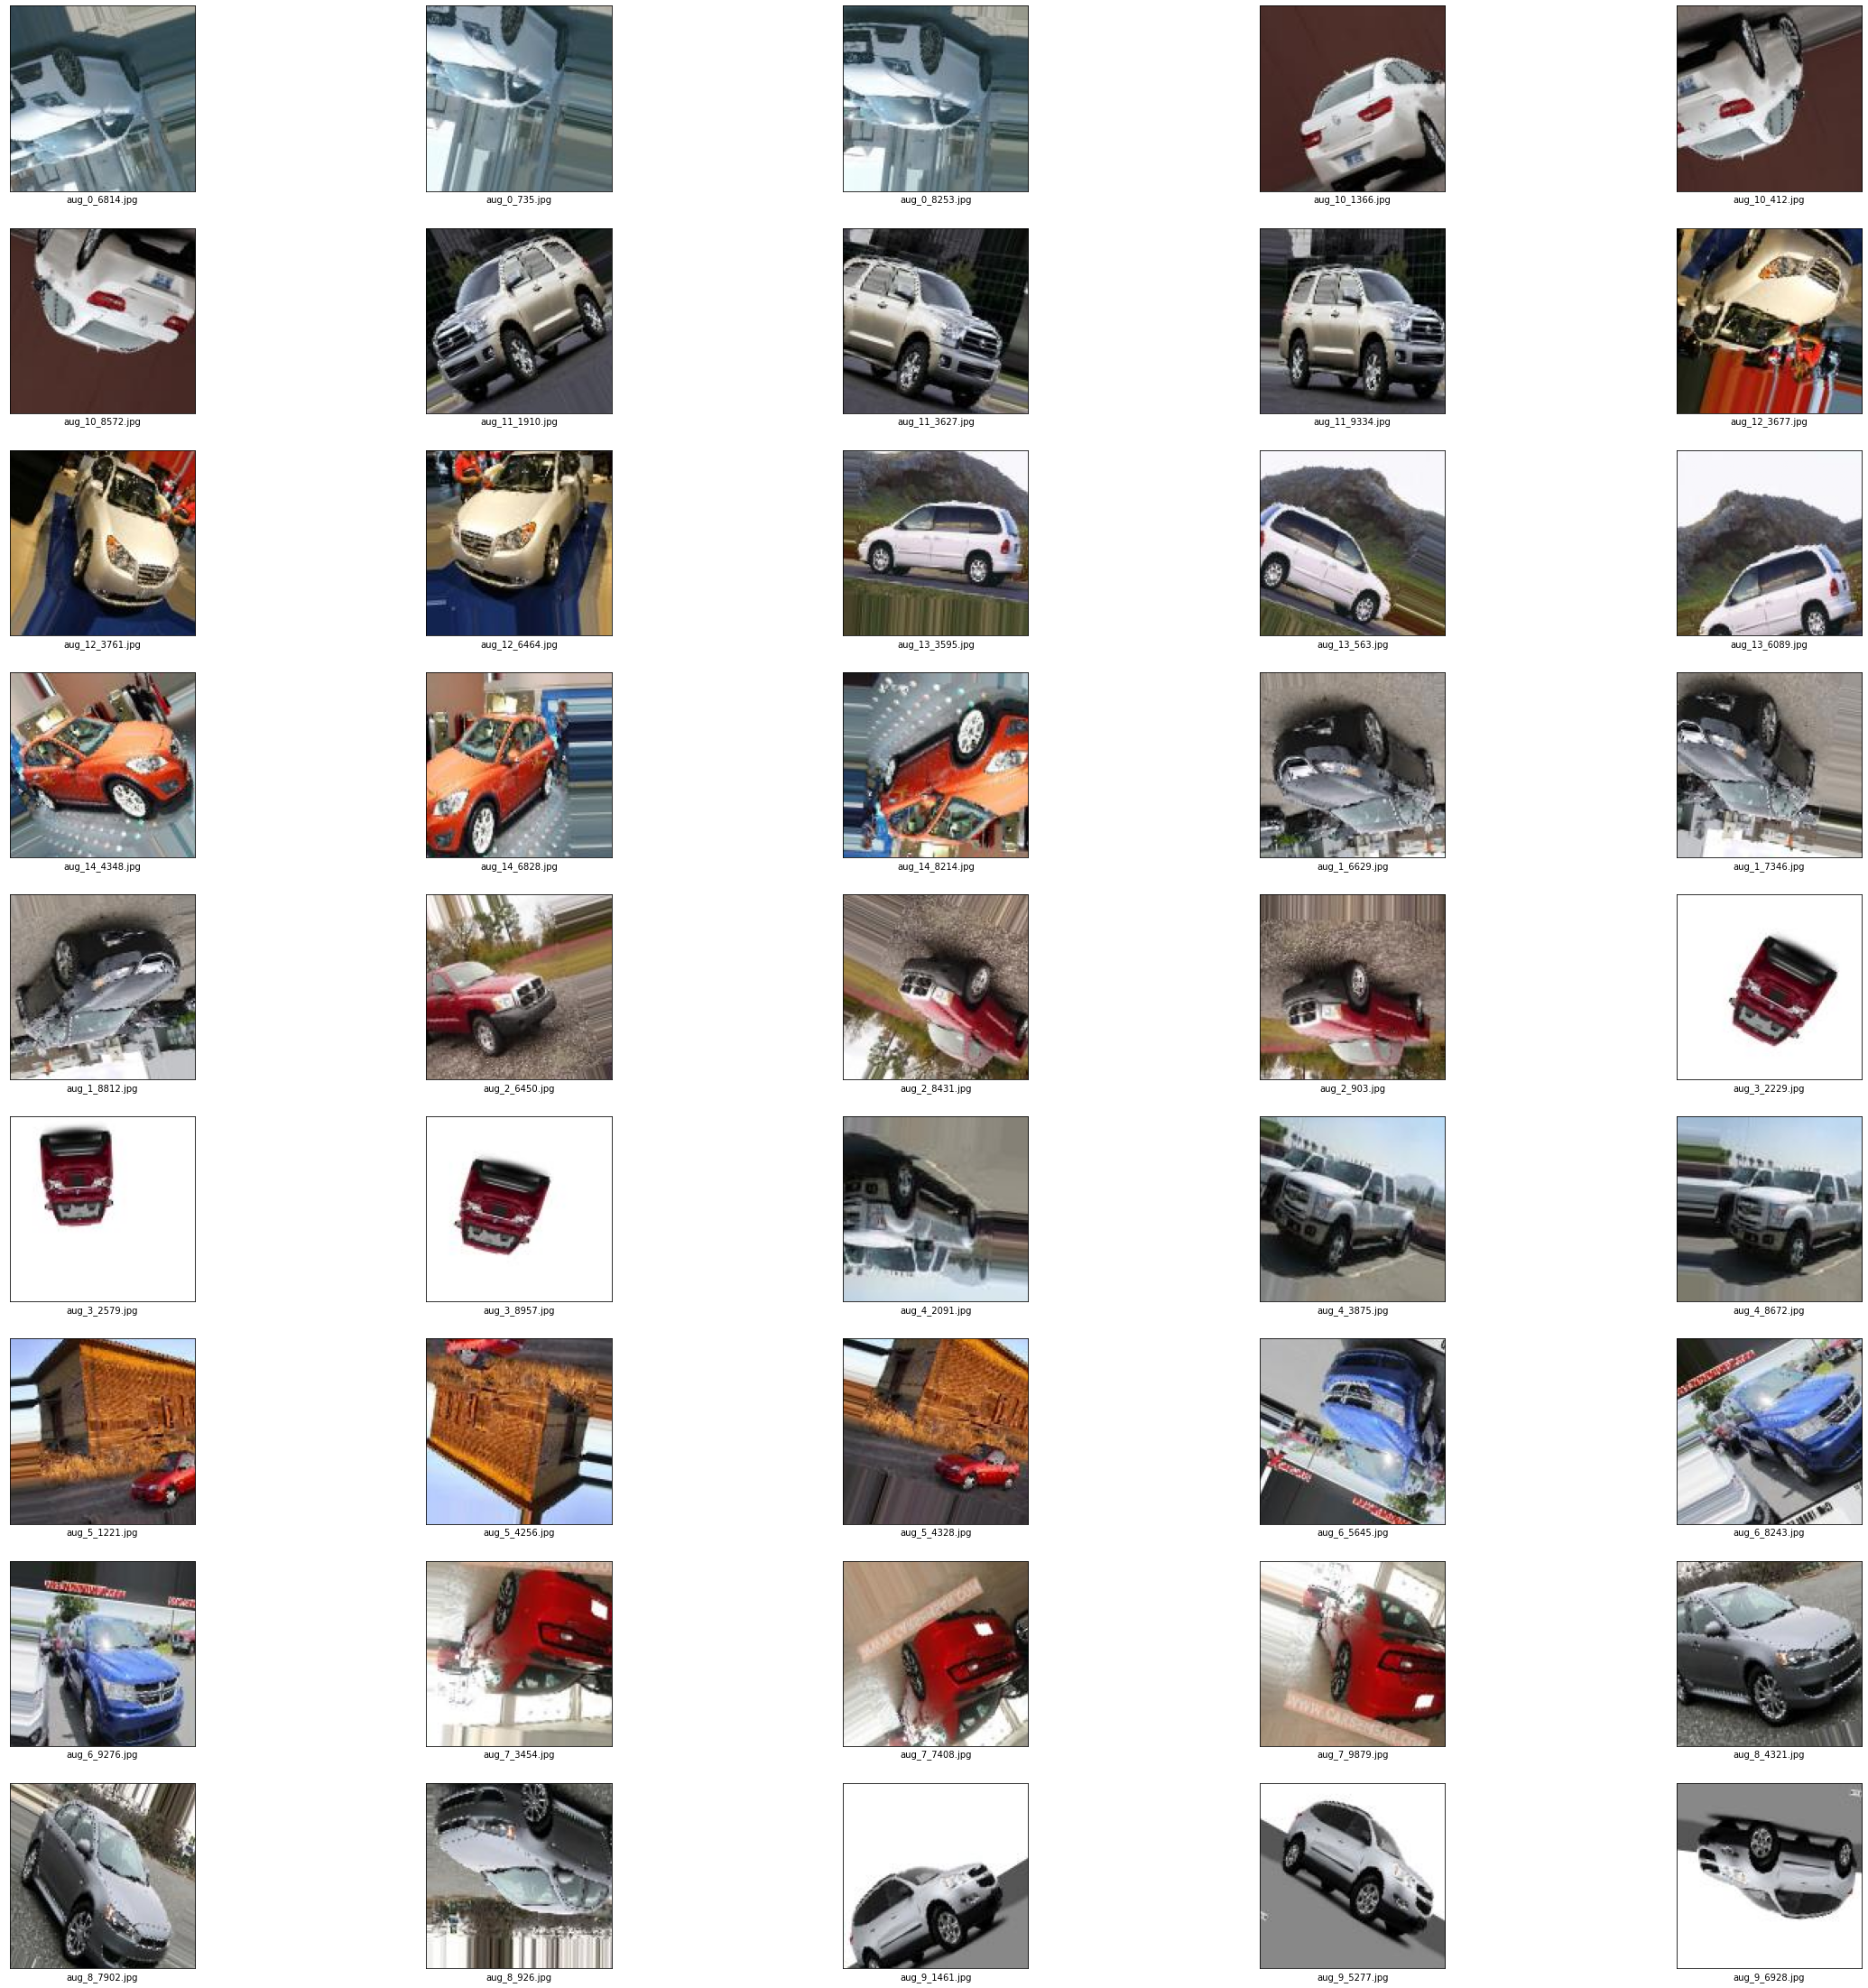

<Figure size 432x288 with 0 Axes>

In [19]:
# Display augmented car images
plt.figure(figsize=(40,40))
for i in range(45):
    plt.subplot(9,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imgs[i])
    plt.xlabel(files[i])
_ = plt.show()
_ = plt.tight_layout()

#### Conclusion

- Image classifier would require data on images (as features) and corresponding image labels (i.e., car makes) (as target) for this being a supervised learning problem
- Given the task is to build image dataset that would aid classify input car images by car makes, we prepared augmented images along with class labels
- Having augmented images would enhance the sample set with variabilities - this would enable image classification model to learn data better
- In terms of difficulties for the task, the input images are only 15 which is too small a sample to apply image classifier on.
- Car models may be upgraded in next couple of years and hence look and feel may change for the same model. Hence the CNN model will need fine-tuning with new sample input images.
- Quality of the input images are also an important factor as bad quality images would make it difficult to track the logo too.
- Body style may be another relevant feature to consider for this classification task.
- On another thought - here the task is classify car images by car makes - rather than classifying car vs bus vs truck etc. So we need more advanced image classification model like RNN for this kind of task, as I think for example, CNN is more suited to evaluate cars as cars etc. rather than variation among cars.
- Nevertheless, with more data, it would be interesting to see how the CNN based classifier would perform for the task in reality.
- Google Lens is a classic example that does the exact same task of brand prediction based on input car image.

## <center><font color='green'>*******End of Task Solution*******</font></center>